In [14]:
from prevelop import preparation, exploration, clustering, evaluation

__Data Preparation and Preprocessing__

In [15]:
# ### Load the data (Mac)
# # Load the cad-data
# cad_data = preparation.load_data(r"C:\Users\IM-KI\Documents\PrEvelOp\repo\notebooks\demo_data\Römheld_cad.xlsx")
# load process-data
process_data = preparation.load_data(r"demo_data/Römheld_prozess.xlsx")
# load link data
link_data = preparation.load_data(r"demo_data/Römheld_teile_zeichnungen.xlsx")

In [16]:
# ### Load the data
# # load process-data
# process_data = preparation.load_data(r"C:\Users\IM-KI\Documents\PrEvelOp_Daten_Römheld\Römheld_prozess_2.xlsx")
# # load link data
# link_data = preparation.load_data(r"C:\Users\IM-KI\Documents\PrEvelOp_Daten_Römheld\Römheld_teile_zeichnung.xlsx")

In [17]:
process_data.head()

Teil  POSITIONS_NR  BELEGUNGSEINHEIT_NR  RUESTZEIT  ZEIT_JE_EINHEIT  \
0  3128280            10                66300      5.000             1.00   
1  3412946            10                64102     32.000             1.65   
2  3412946            20                63205      5.000             1.00   
3  3412946            30                63203      1.000             0.01   
4  3412946            40                99999      0.001             0.00   

   VORLAUFZEIT  
0         1.00  
1         0.00  
2         0.34  
3         0.50  
4         0.00

In [18]:
import pandas as pd

In [19]:
### load cad-data
# for cad-data received from SIMUS, apply the following cleaning steps
# file = 'C:/Users/IM-KI/Documents/PrEvelOp_Docs/Export_classmate/csvfolding-2025-02-26_14-05-26.csv'
file = 'demo_data/csvfolding-2025-02-26_14-05-26.csv'
num_columns = ['Volumen','L','B','H','Da max.','Di min.','Lrot','Gesamtanzahl Bohrungen','Anzahl Außenabsätze', 
               'Gesamtanzahl Eindrehungen außen','Gesamtanzahl Eindrehungen innen','Fasenbreite rechts', 
               'Endenwinkel rechts','Anzahl Innenabsätze']
cat_columns = ['Klasse','Eindrehungsart außen','Eindrehungsanordnung außen','Absatzform','Bohrungsanordnung',
               'Anbringung Bohrungsanordnung','Bohrungsart','Ende rechts','Innenform']
cad_data, num_columns, cat_columns = preparation.load_simus_data(file, num_columns, cat_columns)

In [20]:
cad_data.head()

Volumen      L      B      H  Da max.  Di min.   Lrot  \
0   21122.01  230.0  16.66  16.66    16.66     12.5  230.0   
1    2445.25   30.0  17.00  17.00    17.00      6.5   30.0   
2     757.54   20.0  20.00   3.80    20.00      9.0    3.8   
3  126976.50   81.5  60.00  60.00    60.00     32.0   81.5   
4  244025.92   81.0  80.00  80.00    80.00     40.0   81.0   

   Gesamtanzahl Bohrungen  Anzahl Außenabsätze  \
0                     0.0                  1.0   
1                     0.0                  5.0   
2                     0.0                  1.0   
3                     9.0                  3.0   
4                    10.0                  3.0   

   Gesamtanzahl Eindrehungen außen  ...  \
0                              0.0  ...   
1                              0.0  ...   
2                              0.0  ...   
3                              1.0  ...   
4                              1.0  ...   

   Innenform_gleichmäßiger Einsich mit Ebene und Konus  Innenform_RND_011  \
0                                                  0                    0   
1                                                  0                    1   
2                                                  0                    0   
3                                                  0                    0   
4                                                  0                    0   

   Innenform_RND_010  Innenform_Rotationsteilstirnfläche  \
0                  0                                   0   
1                  0                                   0   
2                  0                                   0   
3                  1                                   0   
4                  1                                   0   

  Innenform_gleichmäßiger Einstich Konus beidseitig  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Innenform_unregelmäßig abgesetzt  Innenform_Einzelbohrung  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        1   
4                                 0                        0   

   Innenform_Durchgangsbohrung gestuft  Innenform_RND_013  \
0                                    0                  0   
1                                    0                  0   
2                                    0                  1   
3                                    0                  0   
4                                    1                  0   

   Innenform_einseitig steigend  
0                             0  
1                             1  
2                             0  
3                             0  
4                             0  

[5 rows x 465 columns]

In [21]:
### clean process data
# delete all rows with value 99999 in column 'BELEGUNGSEINHEIT_NR'
process_data = process_data[process_data['BELEGUNGSEINHEIT_NR'] != 99999]

In [22]:
### aggregate process data
process_data = preparation.aggregate_data(process_data, key='Teil', columns=['BELEGUNGSEINHEIT_NR'], methods=['encode'])

In [23]:
### prepare the data
# select numerical, binary and categorical columns for preprocessing
cat_columns1 = cat_columns.tolist()
cat_columns2 = [column for column in process_data.columns if column != 'Teil']
cat_columns = cat_columns1 + cat_columns2

data, data_preprocessed = preparation.prepare_data(cad_data, process_data, link_data, num_columns, cat_columns, key_cad='Zeichnung', key_process='Teil')

__Exploration__

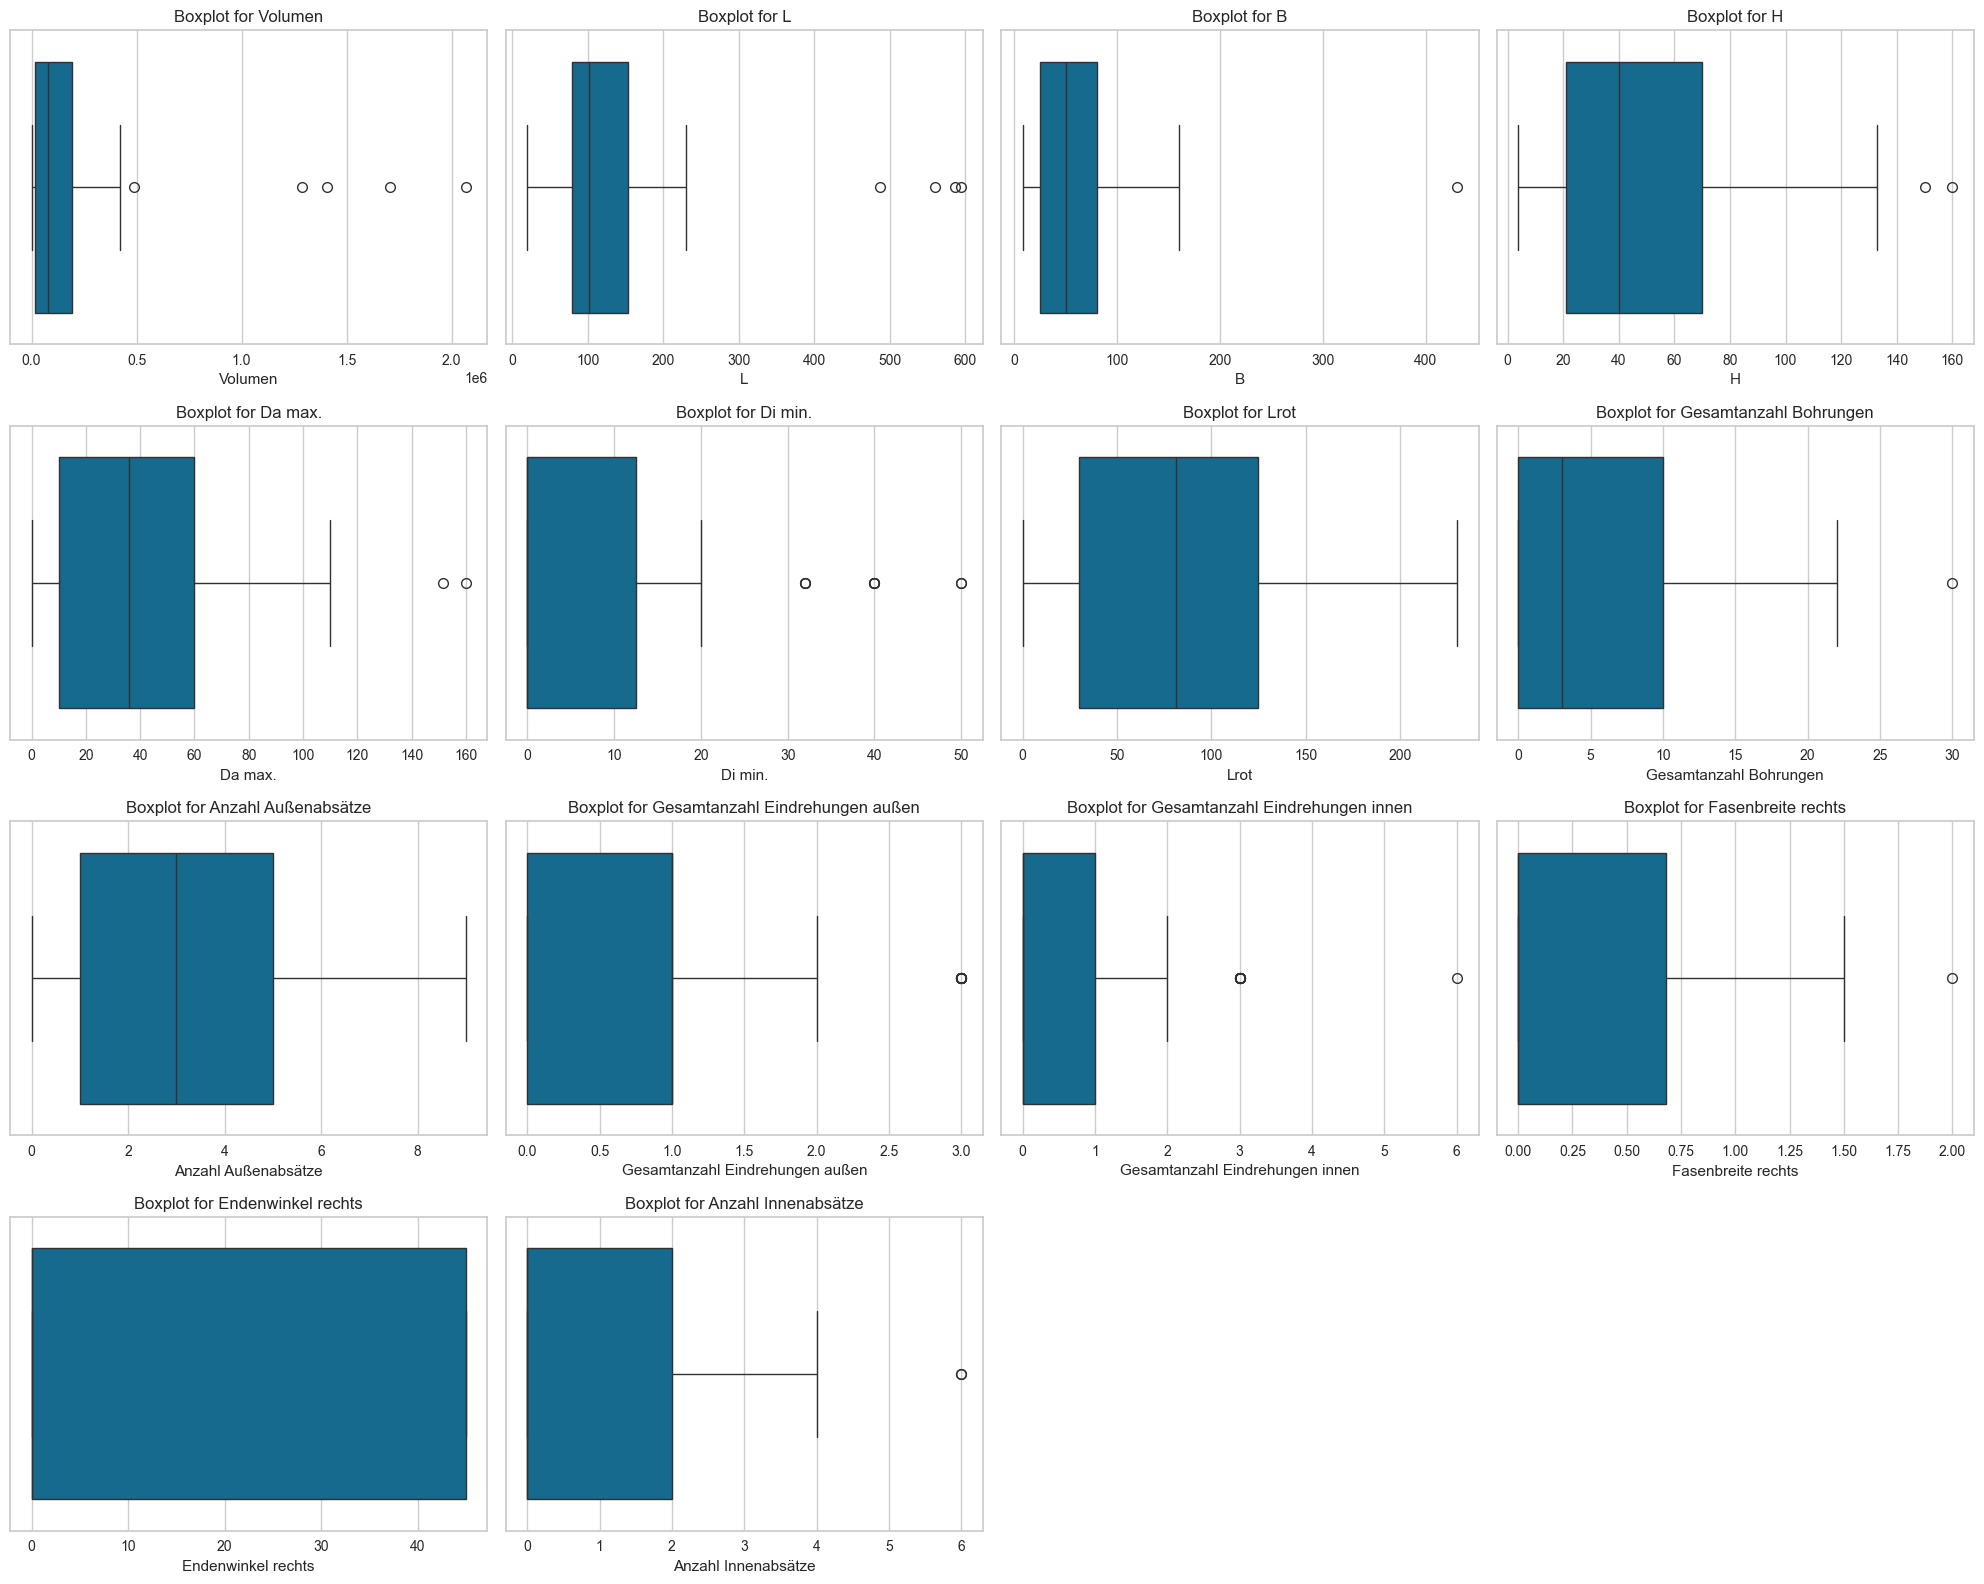

In [24]:
# show boxplots of the numerical columns
exploration.boxplots(data, num_columns)

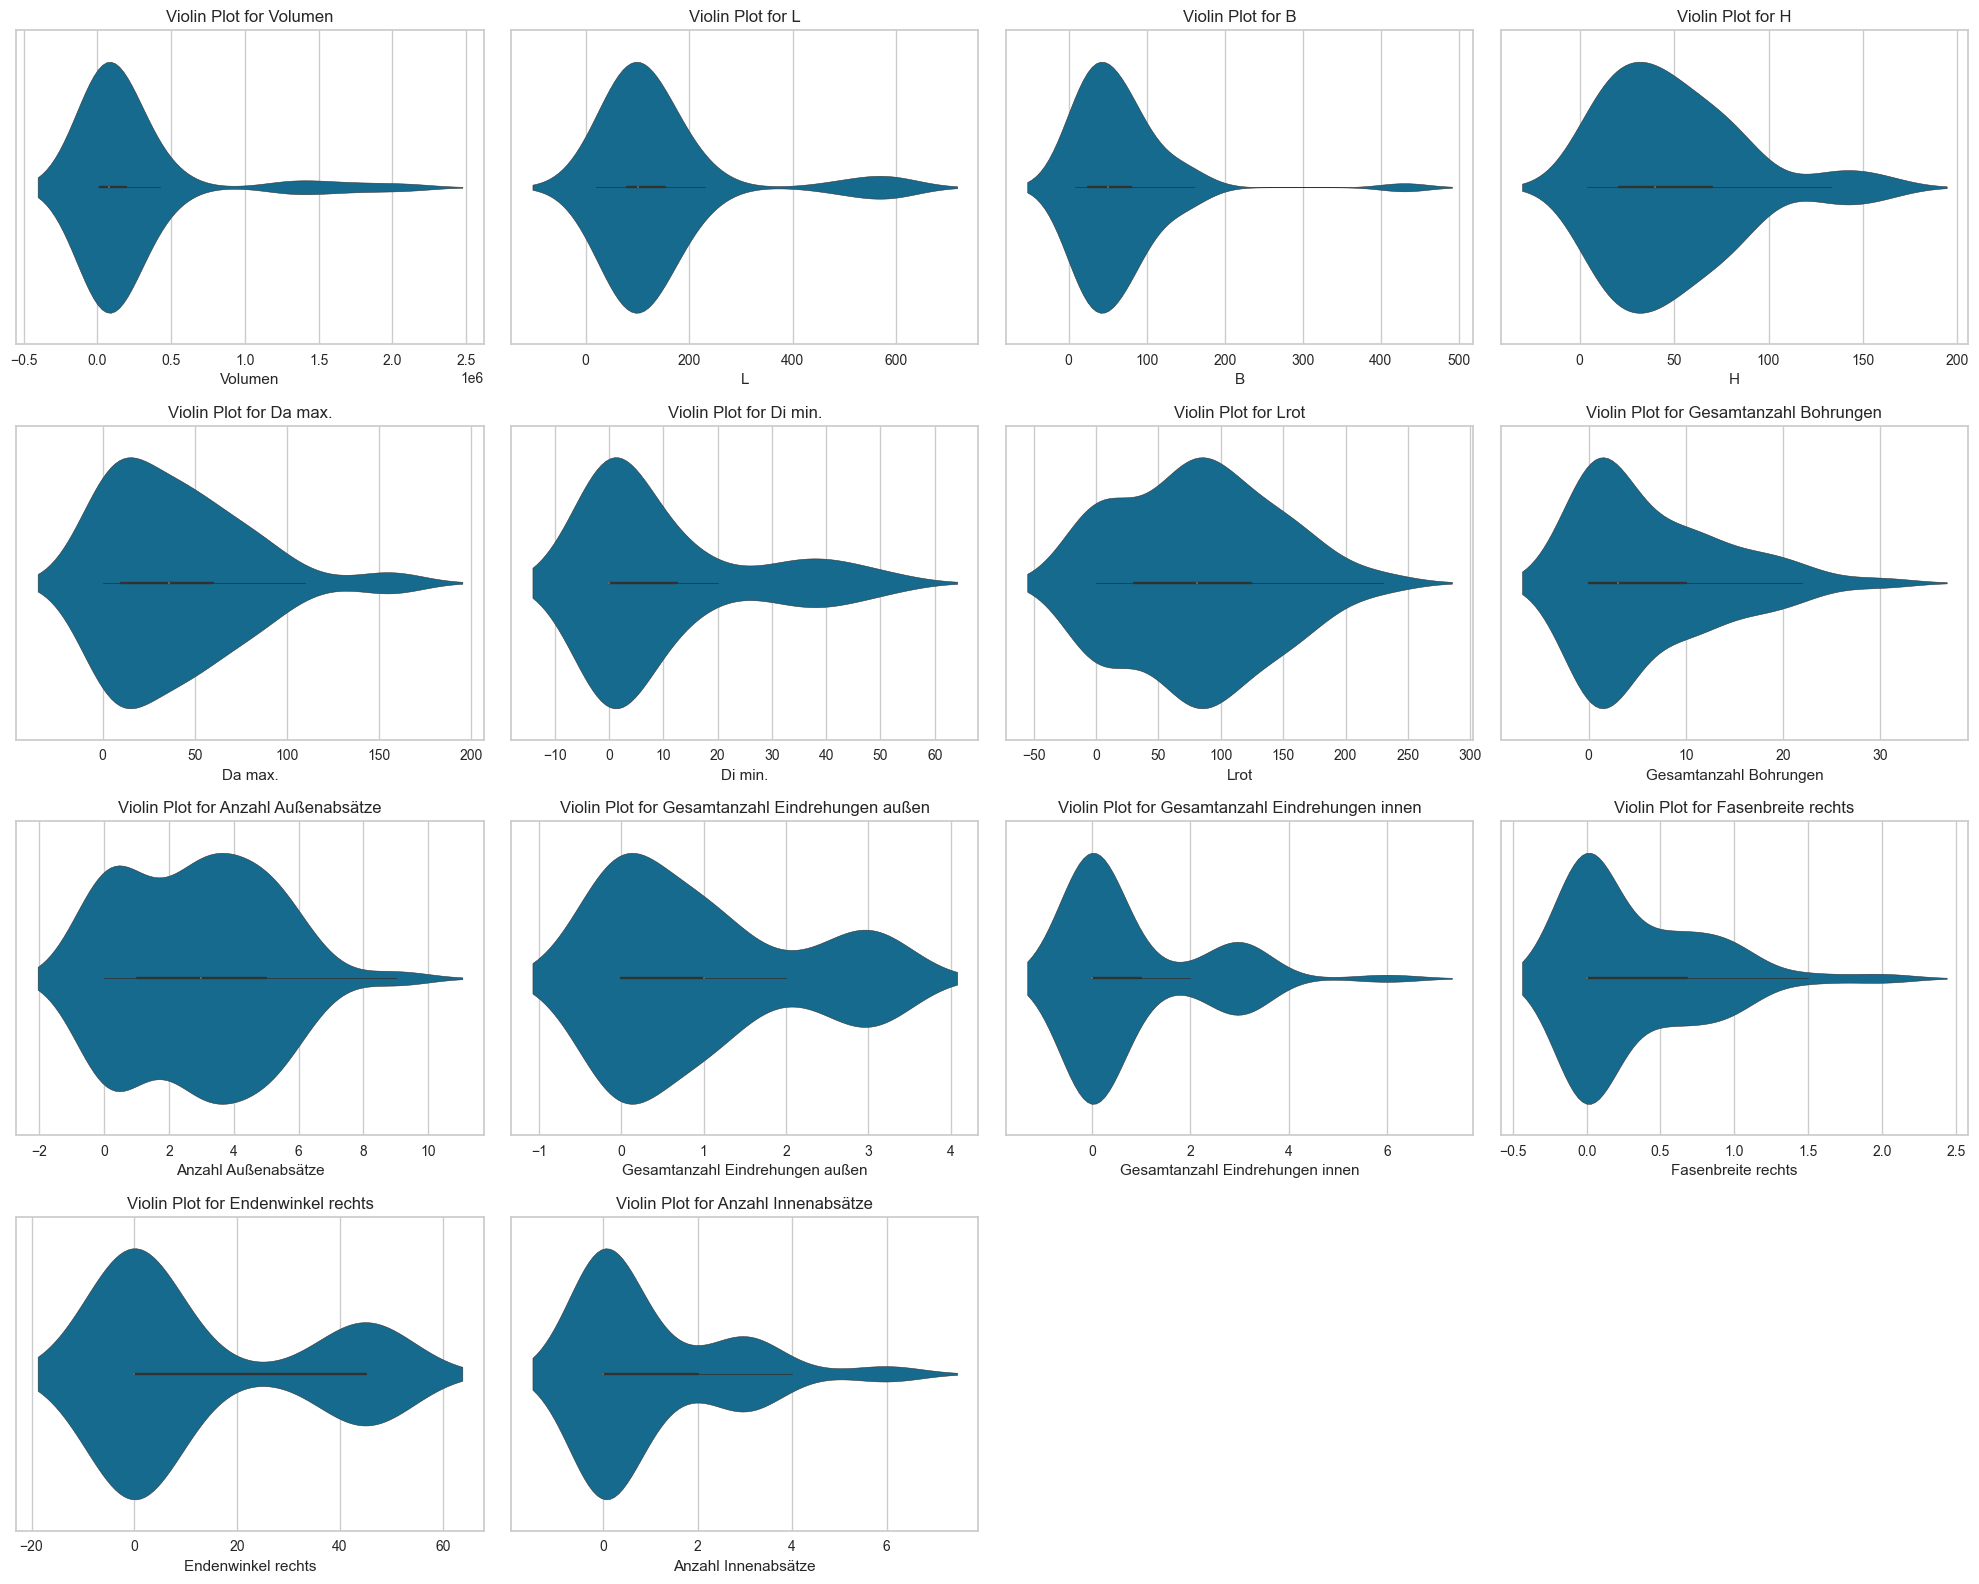

In [25]:
# show violonplot of data
exploration.violinplots(data, num_columns)

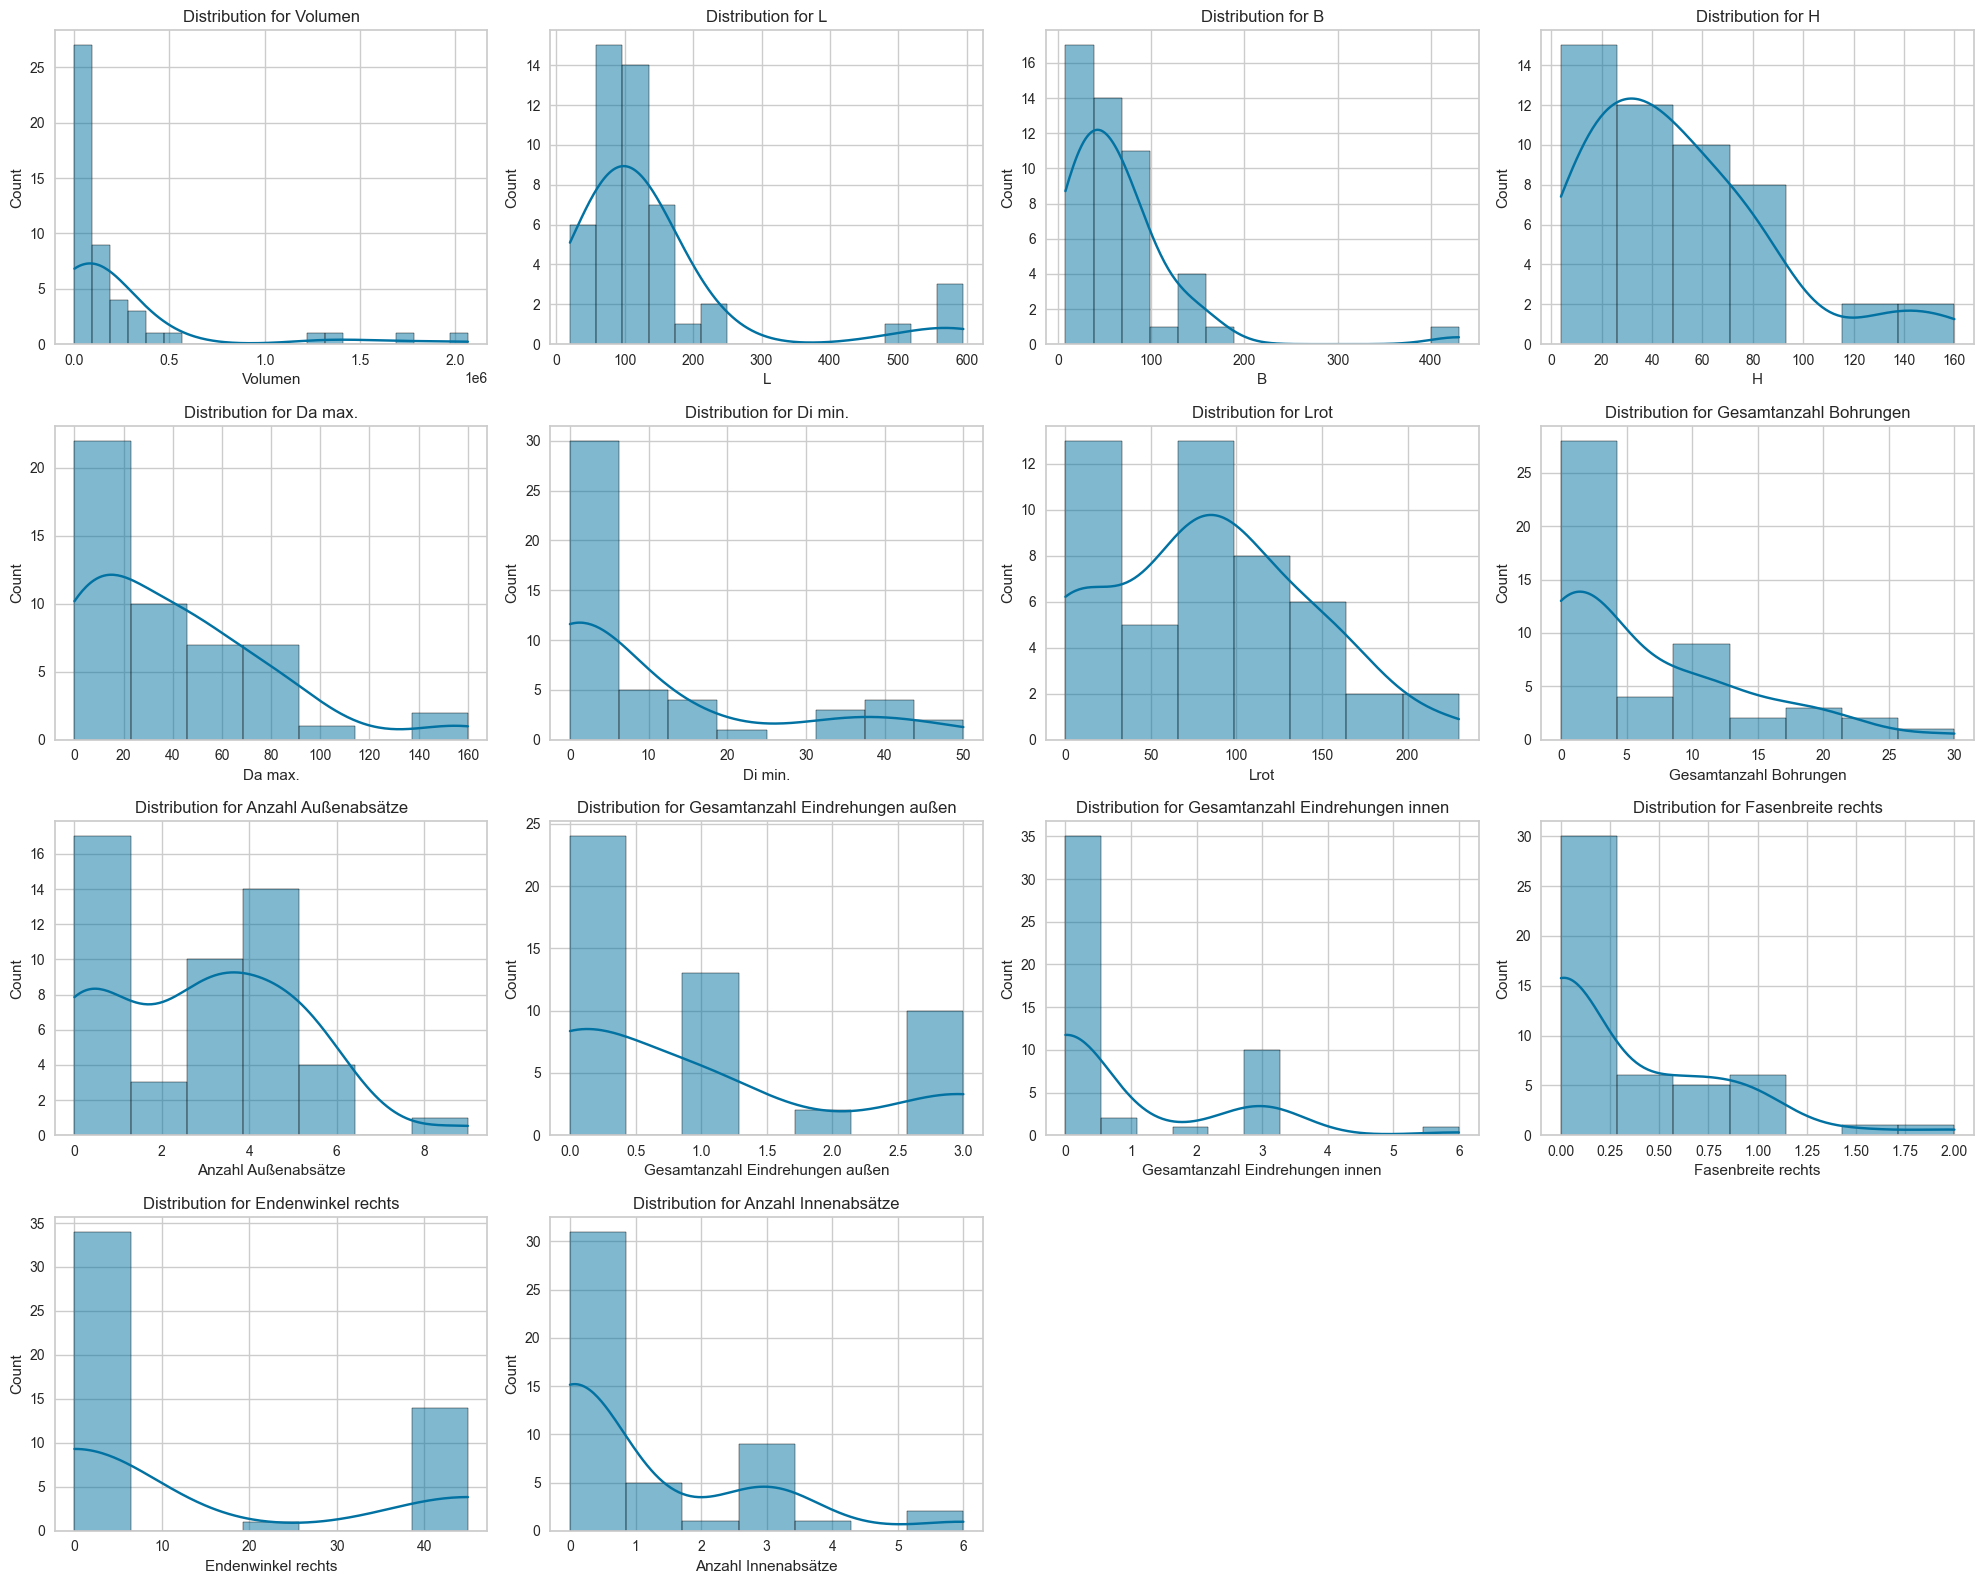

In [26]:
# show histograms of categorical columns
exploration.distributions(data, num_columns)

In [27]:
# show parallel_coordinates_plot of data
# exploration.barplots(data, cat_columns)

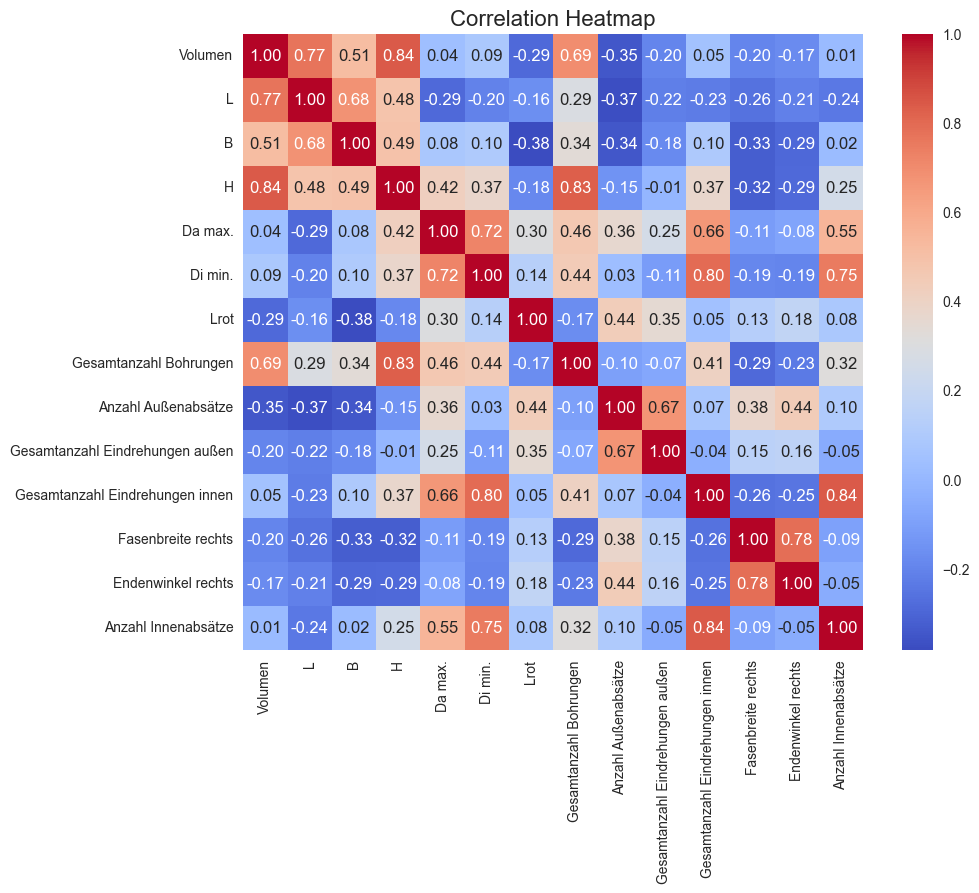

In [28]:
# show heatmap of data
exploration.heatmap(data, num_columns)

In [29]:
# z-score analysis of data
exploration.z_score_analysis(data, num_columns)

Volumen      L      B      H  Da max.  Di min.   Lrot  \
Teil                                                                  
3470474      23884.52   68.5   36.0   32.0     36.0     10.0   68.5   
3632342     120487.58   80.0   61.0   61.0     61.0     16.3   80.0   
3656547    1705082.50  587.0  133.0  133.0      0.0      0.0    0.0   
3656552    2067654.99  560.0  150.0  150.0      0.0      0.0    0.0   
3681000       9401.35   60.0   21.0   21.0     21.0     14.0   60.0   
503200034   488550.81  595.0  430.0   50.0      0.0      0.0    0.0   
520100768  1288963.97  170.0  160.0  160.0    160.0     40.0  170.0   

           Gesamtanzahl Bohrungen  Anzahl Außenabsätze  \
Teil                                                     
3470474                       4.0                  5.0   
3632342                       6.0                  2.0   
3656547                      18.0                  0.0   
3656552                      22.0                  0.0   
3681000                       0.0                  1.0   
503200034                     0.0                  0.0   
520100768                    30.0                  2.0   

           Gesamtanzahl Eindrehungen außen  ...  BELEGUNGSEINHEIT_NR 63720  \
Teil                                        ...                              
3470474                                2.0  ...                          0   
3632342                                1.0  ...                          0   
3656547                                0.0  ...                          0   
3656552                                0.0  ...                          0   
3681000                                0.0  ...                          0   
503200034                              0.0  ...                          0   
520100768                              1.0  ...                          0   

           BELEGUNGSEINHEIT_NR 68200  BELEGUNGSEINHEIT_NR 64102  \
Teil                                                              
3470474                            0                          0   
3632342                            0                          0   
3656547                            0                          0   
3656552                            0                          0   
3681000                            0                          0   
503200034                          0                          0   
520100768                          0                          0   

           BELEGUNGSEINHEIT_NR 64103  BELEGUNGSEINHEIT_NR 68205  \
Teil                                                              
3470474                            0                          0   
3632342                            1                          0   
3656547                            0                          0   
3656552                            0                          0   
3681000                            0                          0   
503200034                          0                          0   
520100768                          0                          0   

           BELEGUNGSEINHEIT_NR 96501  BELEGUNGSEINHEIT_NR 64506  \
Teil                                                              
3470474                            1                          0   
3632342                            1                          0   
3656547                            1                          0   
3656552                            1                          0   
3681000                            0                          0   
503200034                          1                          0   
520100768                          1                          0   

           BELEGUNGSEINHEIT_NR 62203  BELEGUNGSEINHEIT_NR 66300  \
Teil                                                              
3470474                            0                          0   
3632342                            0                          0   
3656547                            0                          0   
3

In [30]:
# apply isolation forest to detect outliers
exploration.isolation_forest(data, num_columns)

Volumen      L      B      H  Da max.  Di min.   Lrot  \
Teil                                                                  
3656552    2067654.99  560.0  150.0  150.0      0.0      0.0    0.0   
503200034   488550.81  595.0  430.0   50.0      0.0      0.0    0.0   
520100768  1288963.97  170.0  160.0  160.0    160.0     40.0  170.0   

           Gesamtanzahl Bohrungen  Anzahl Außenabsätze  \
Teil                                                     
3656552                      22.0                  0.0   
503200034                     0.0                  0.0   
520100768                    30.0                  2.0   

           Gesamtanzahl Eindrehungen außen  ...  BELEGUNGSEINHEIT_NR 63720  \
Teil                                        ...                              
3656552                                0.0  ...                          0   
503200034                              0.0  ...                          0   
520100768                              1.0  ...                          0   

           BELEGUNGSEINHEIT_NR 68200  BELEGUNGSEINHEIT_NR 64102  \
Teil                                                              
3656552                            0                          0   
503200034                          0                          0   
520100768                          0                          0   

           BELEGUNGSEINHEIT_NR 64103  BELEGUNGSEINHEIT_NR 68205  \
Teil                                                              
3656552                            0                          0   
503200034                          0                          0   
520100768                          0                          0   

           BELEGUNGSEINHEIT_NR 96501  BELEGUNGSEINHEIT_NR 64506  \
Teil                                                              
3656552                            1                          0   
503200034                          1                          0   
520100768                          1                          0   

           BELEGUNGSEINHEIT_NR 62203  BELEGUNGSEINHEIT_NR 66300  \
Teil                                                              
3656552                            0                          0   
503200034                          1                          0   
520100768                          0                          0   

           BELEGUNGSEINHEIT_NR 63101  
Teil                                  
3656552                            1  
503200034                          0  
520100768                          1  

[3 rows x 494 columns]

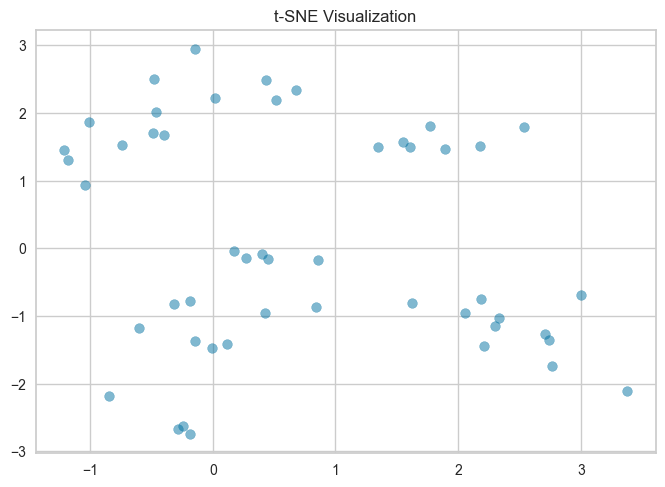

In [31]:
# apply tsne_visualization to visualize the data
exploration.tsne_visualization(data_preprocessed, num_columns)

__Clustering__

In [32]:
### calculate distance matrix
distance_matrix = clustering.gower_distance(data)

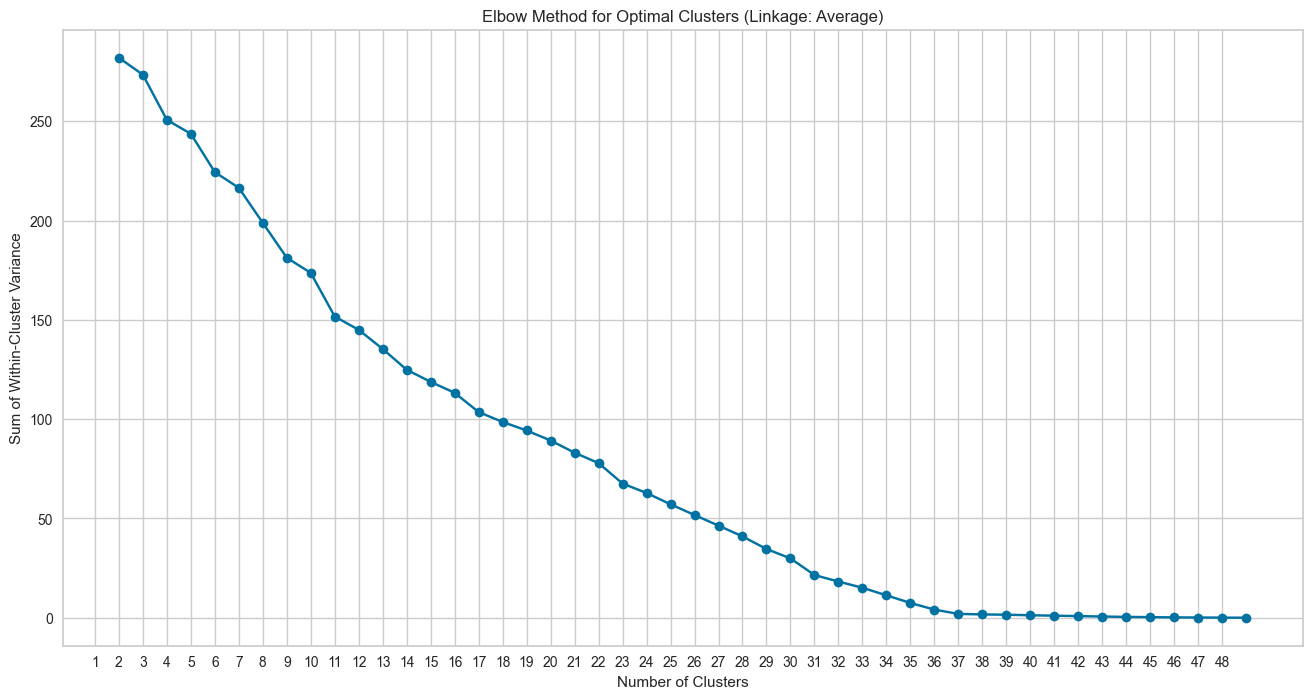

In [33]:
### plot the elbow plot for the first 20 clusters
clustering.elbow_plot_agglomerative(data_preprocessed, distance_matrix, 49)

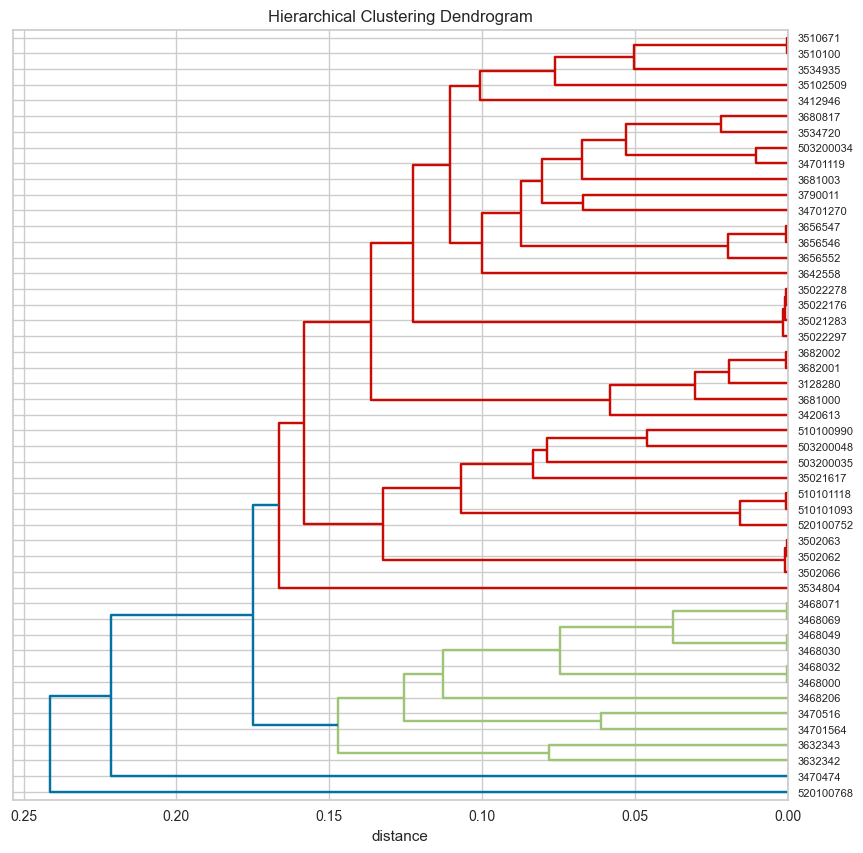

In [34]:
### plot the dendrogram
clustering.plot_dendrogram(distance_matrix, labels=data.index, orientation='left')

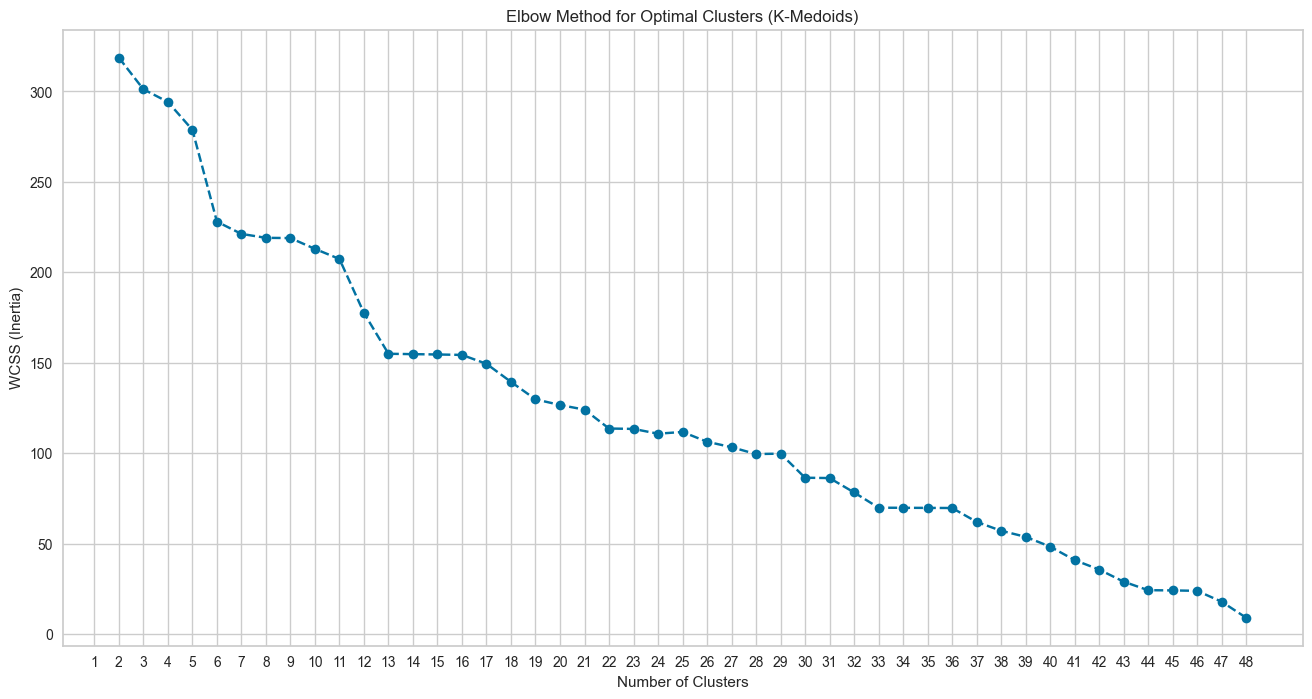

In [35]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.elbow_plot_kmedoids(data_preprocessed, 49)

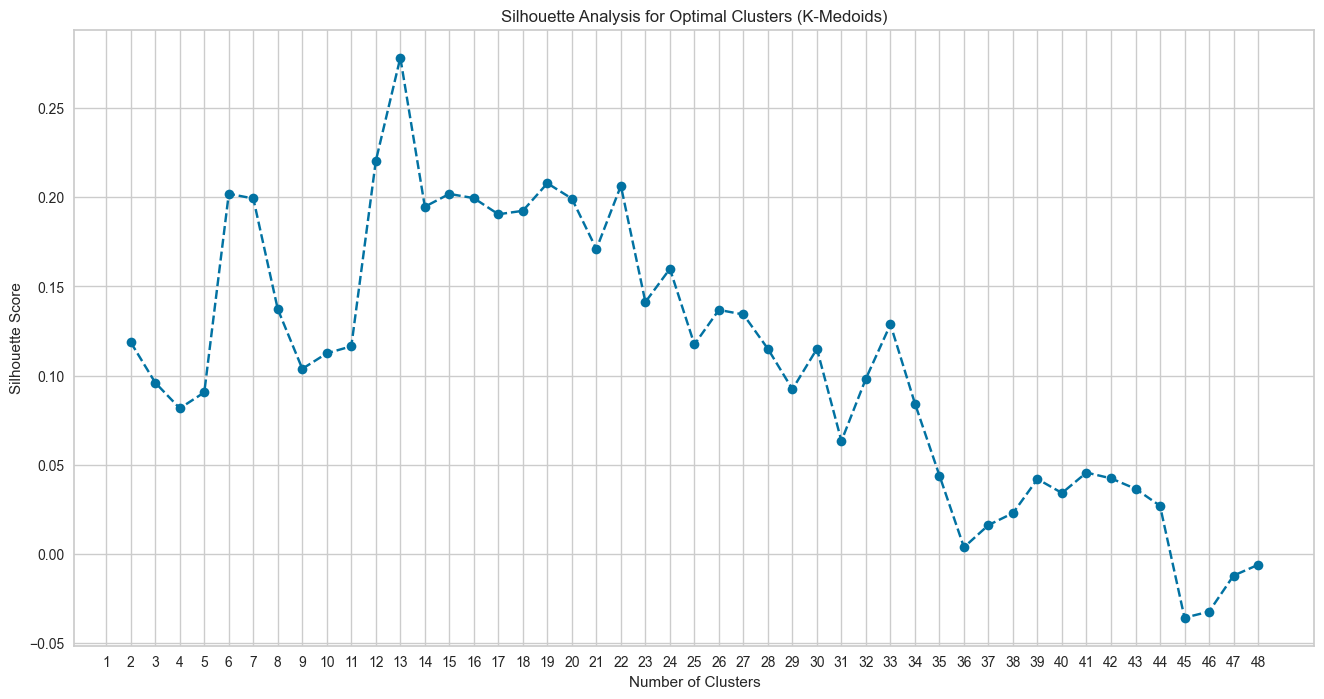

In [36]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.silhouette_score_kmedoids(data_preprocessed, 49)

__Evaluation__

In [41]:
labels = clustering.agglomerative_clustering(distance_matrix, 37)

In [42]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

{'dbi': 0.022763435899545846,
 'ch-score': 2415.905385235192,
 'dunn-index': 9.899452856632427,
 'silhouette-score': 0.41222183055426}

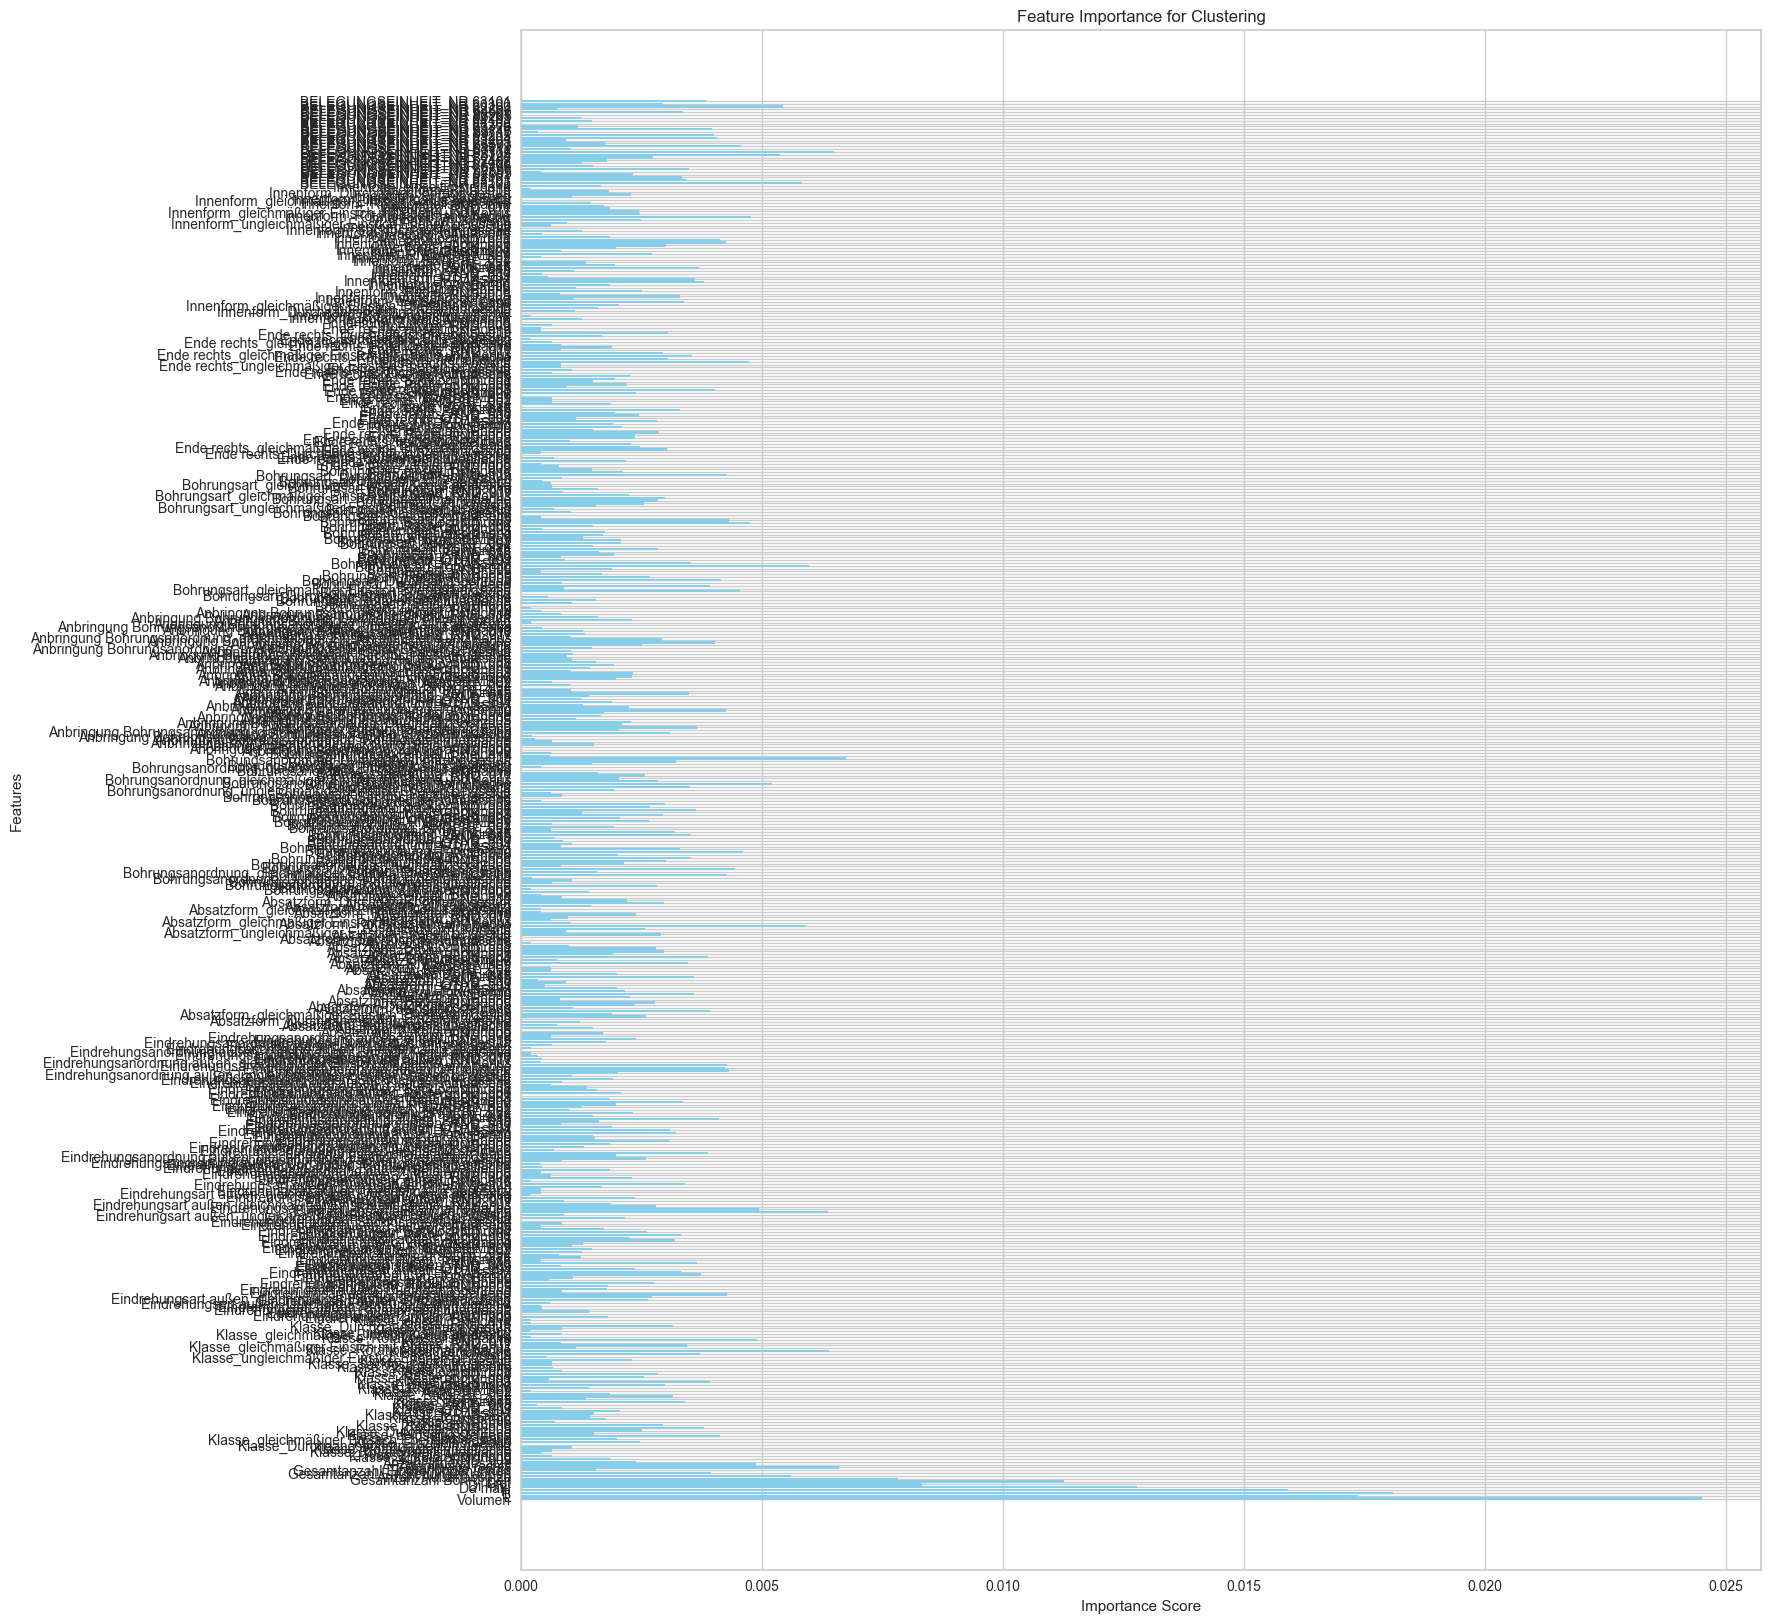

In [43]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

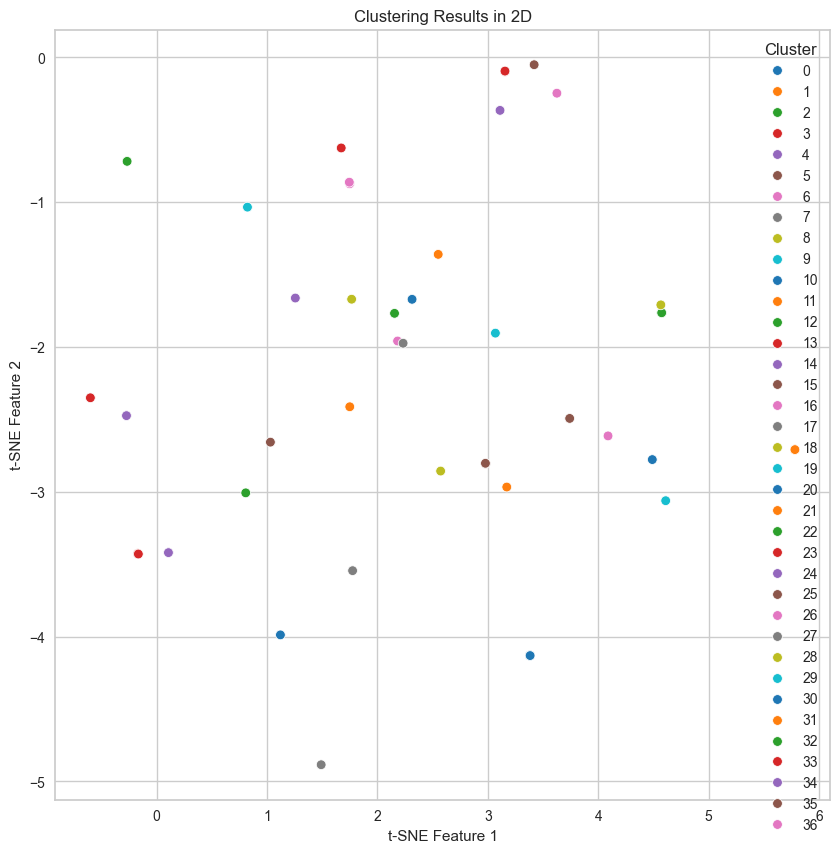

In [44]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)

In [45]:
labels = clustering.kmedoids_clustering(distance_matrix, 21)

In [46]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

{'dbi': 1.0754585359353679,
 'ch-score': 3.752162764571165,
 'dunn-index': 0.025881906041366084,
 'silhouette-score': 0.19724824146470624}

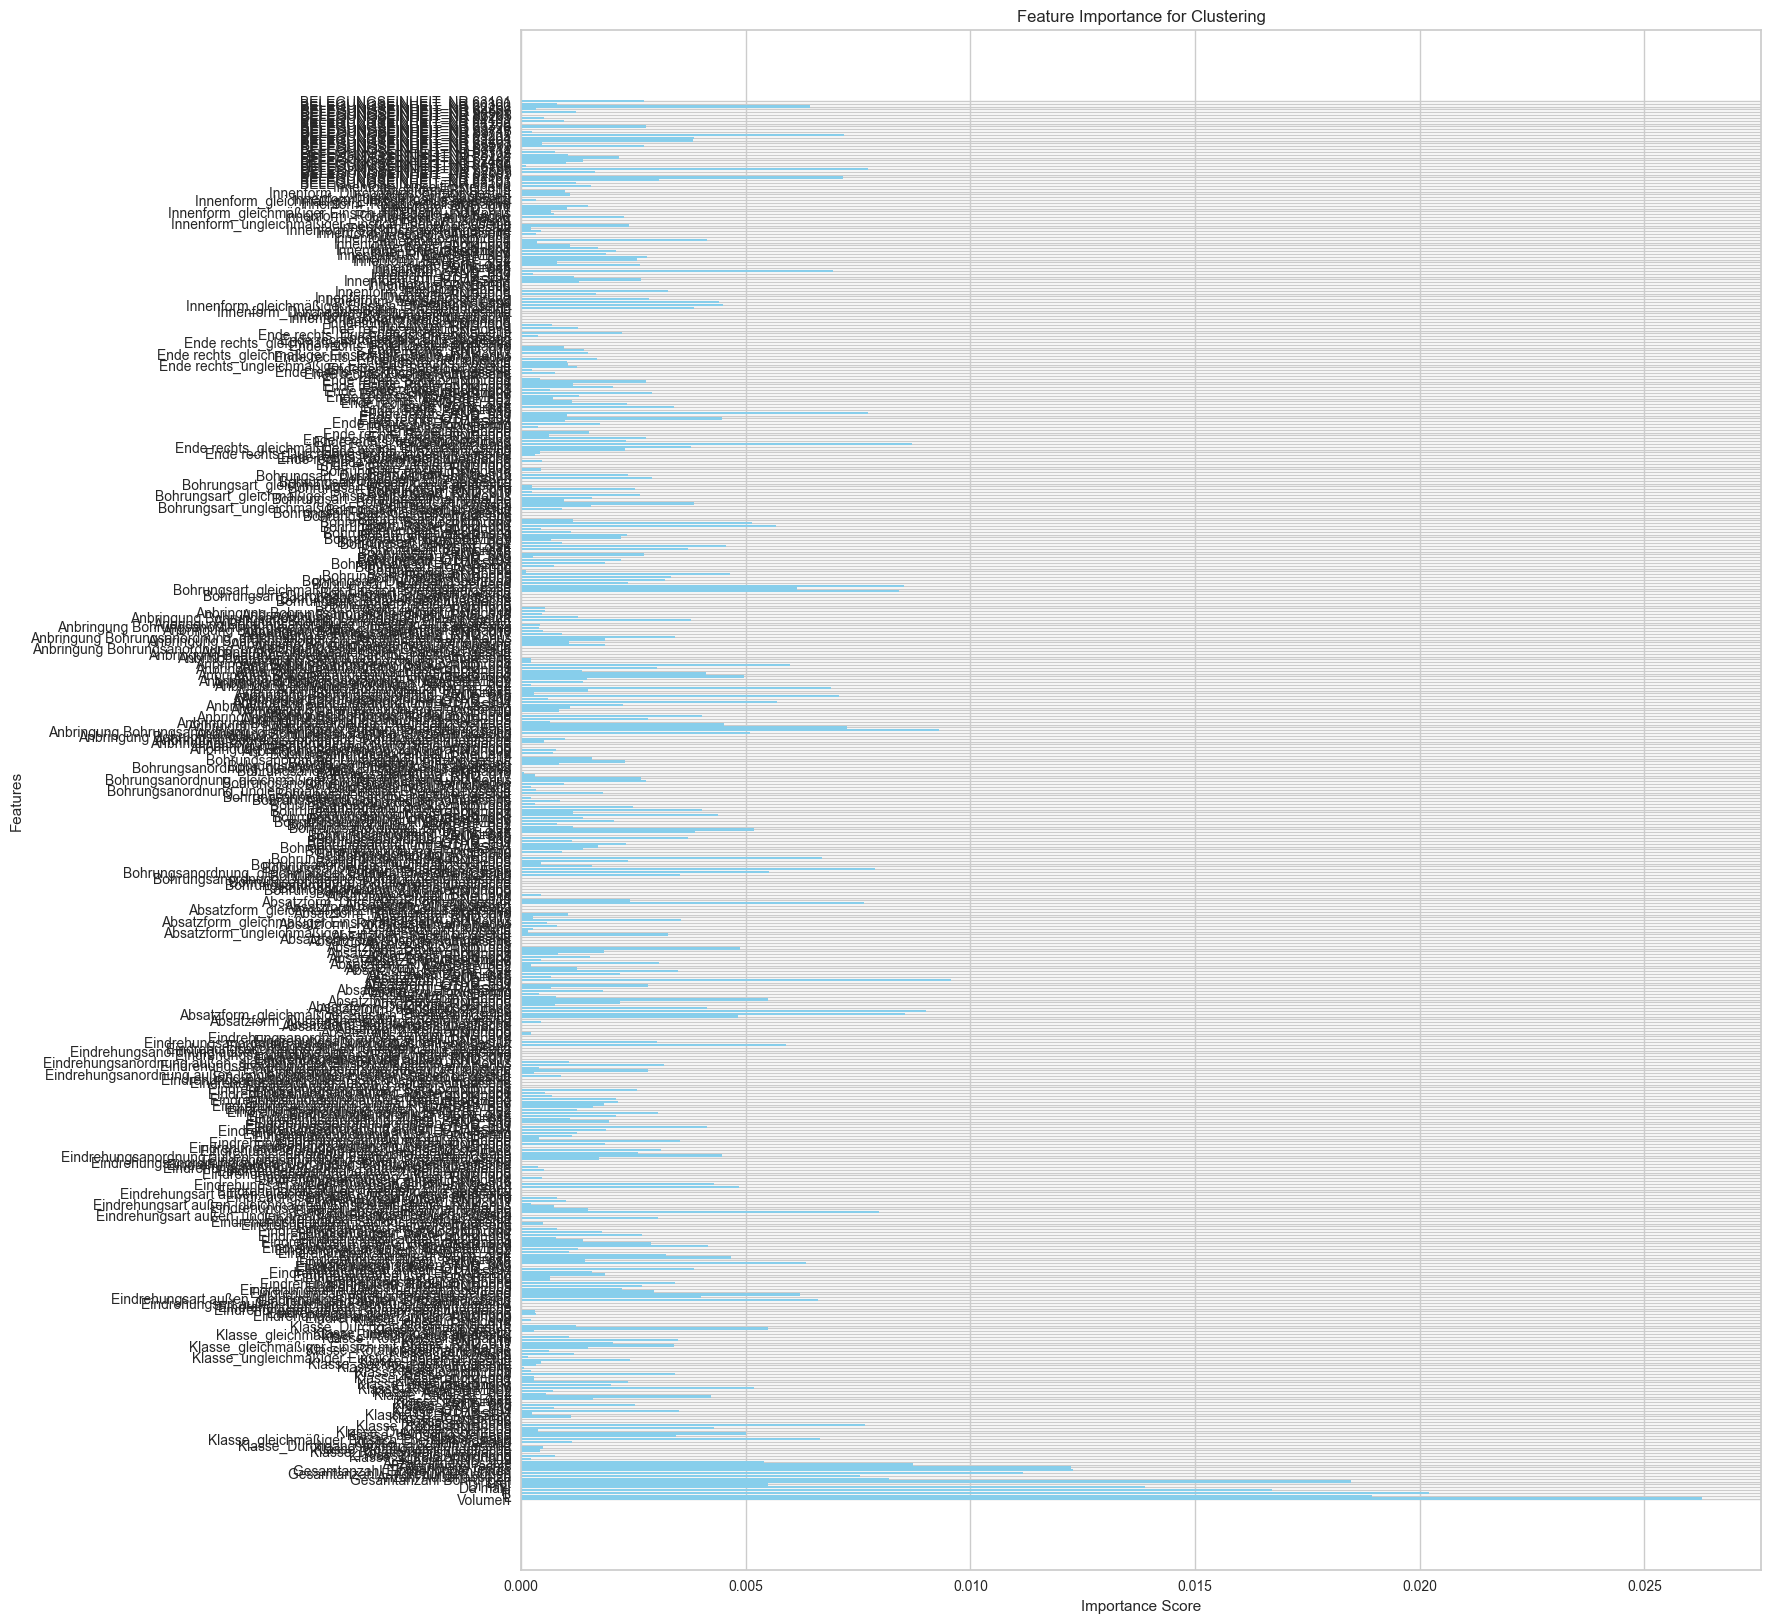

In [47]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

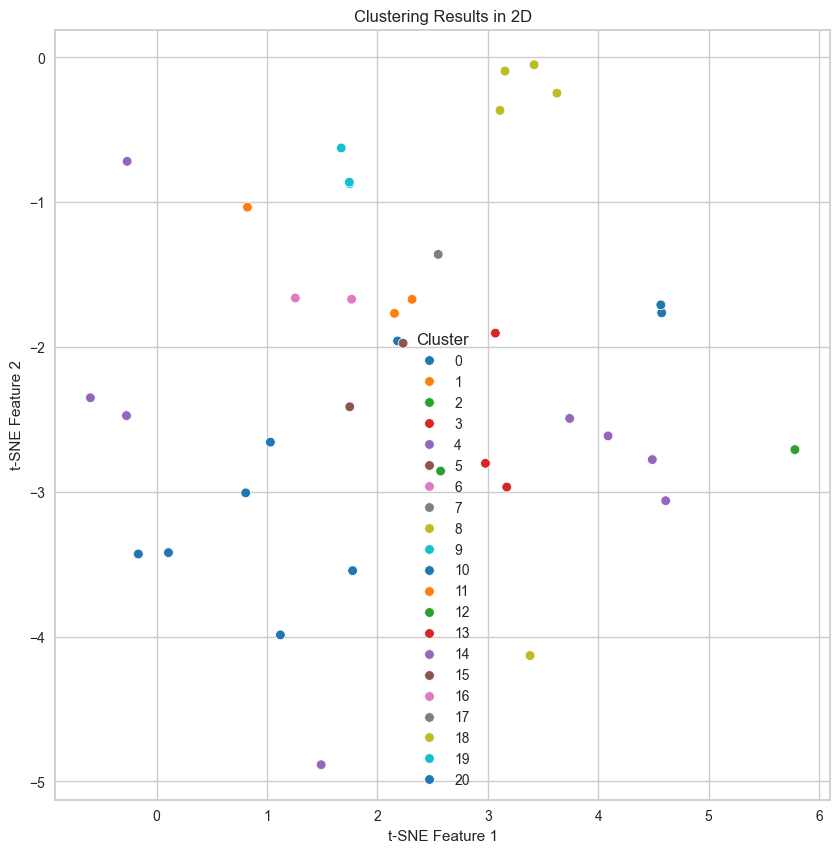

In [48]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)